In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import SteamVariables as sv

dt = pd.read_csv(sv.CSV_PATH, nrows=900000) # nrows=2000000
pd.set_option('display.max_columns', None)
#Dominio: Reviews da Steam
#Tamanho: 2000000
# --------------------Descricao das colunas--------------------
#! app_id - ID do jogo, Discrete
#! app_name - Nome do jogo, Nominal
#! review_id - ID da review, Discrete
#! language - Linguagem da review, Nominal
#! review - Texto da review, Nominal
#! timestamp_created - Data de criacao da review, Discrete
#* timestamp_updated - Data de atualizacao da review, Discrete
#* recommended - Recomendado ou nao, Discrete
#* votes_helpful - Votos de utilidade, Discrete
#* votes_funny - Votos de humor, Discrete
#* weighted_vote_score - Ranking baseado no número de helpful votes, Continuous
#* comment_count - Numero de comentarios, Discrete
#* steam_purchase - Comprado na Steam, Discrete
#* received_for_free - Recebido de graça, Discrete
#? written_during_early_access - Escrito durante o Early Access, Discrete
#? author.steamid - ID do autor, Discrete
#? author.num_games_owned - Numero de jogos do autor, Discrete
#? author.num_reviews - Numero de reviews do autor, Discrete
#? author.playtime_forever - Tempo de jogo total do autor, Continuous
#? author.playtime_last_two_weeks - Tempo de jogo nas ultimas duas semanas do autor, Continuous
#? author.last_played - Ultima vez que o autor jogou, Discrete
# --------------------Descricao das colunas--------------------

languages = ["bulgarian", "croatian", "danish", "czech", "slovak", "slovenian", "slovak", "slovenian", 
"spanish", "estonian", "finnish", "french", "greek", "hungarian", "irish", "italian", 
"latvian", "lithuanian", "maltese", "dutch", "polish", "portuguese", "romanian", "swedish", "english", "brazilian"]

# Eliminar linhas com linguagem diferente das selecionadas
new_dt = dt[dt[sv.LANGUAGE].isin(languages)]

# Eliminar colunas desnecessarias
new_dt.drop(["Unnamed: 0"], axis=1, inplace=True)
new_dt.drop([sv.STEAM_PURCHASE], axis=1, inplace=True)
new_dt.drop([sv.WRITTEN_DURING_EARLY_ACCESS], axis=1, inplace=True)

# Resetar index
new_dt.reset_index(drop=True, inplace=True)

# Eliminar linhas com valores nulos
new_dt.dropna(inplace=True)

# Print da descricao da coluna author.num_games_owned do dataset
print(new_dt)

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


        app_id                  app_name  review_id language  \
0       292030  The Witcher 3: Wild Hunt   85184605  english   
1       292030  The Witcher 3: Wild Hunt   85184171  english   
2       292030  The Witcher 3: Wild Hunt   85184064  english   
3       292030  The Witcher 3: Wild Hunt   85182785  spanish   
4       292030  The Witcher 3: Wild Hunt   85180436  english   
...        ...                       ...        ...      ...   
503425     620                  Portal 2   85034695  english   
503426     620                  Portal 2   85034294  english   
503427     620                  Portal 2   85034229  english   
503428     620                  Portal 2   85033255  english   
503429     620                  Portal 2   85033017  english   

                                                   review  timestamp_created  \
0       One of the best RPG's of all time, worthy of a...         1611379970   
1                  good story, good graphics. lots to do.         16113

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


C:\Users\Miguel\AppData\Local\Temp/ipykernel_24636/3286473675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dt["review_char_count"] = new_dt["review"].apply(len)


[Text(0, 0, 'The Witcher 3: Wild Hunt'),
 Text(1, 0, 'Half-Life'),
 Text(2, 0, 'Counter-Strike: Source'),
 Text(3, 0, 'Half-Life 2: Episode Two'),
 Text(4, 0, 'Portal 2')]

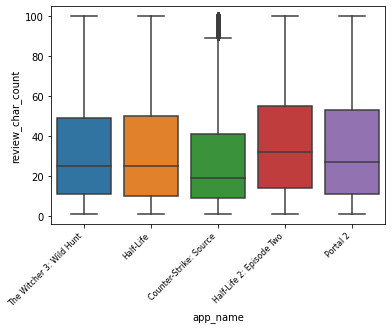

In [21]:

#!Aplica a função length nas reviews de um dado jogo
new_dt["review_char_count"] = new_dt["review"].apply(len)

#!Cria um subdataset com um limite de 100 caracteres
steam_data_subset = new_dt[new_dt["review_char_count"] <= 100]

ax = sns.boxplot(x="app_name", y="review_char_count", data=steam_data_subset)

#! Apenas muda as labels no eixo do x para serem mais legiveis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)

#! Utililidade disto?
#! 0 !#


C:\Users\Miguel\AppData\Local\Temp/ipykernel_24636/3071671840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dt["review_char_count"] = new_dt["review"].apply(len)


<AxesSubplot:xlabel='app_name', ylabel='review_char_count'>

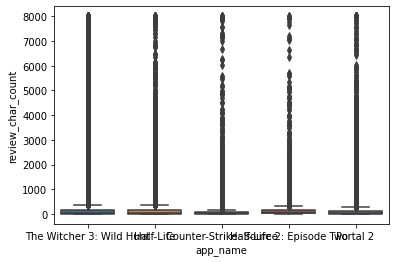

In [22]:

##!Se não fosse limitado: o numero de caracteres por comentario
new_dt["review_char_count"] = new_dt["review"].apply(len)
sns.boxplot(x="app_name", y="review_char_count", data=new_dt)